In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-symptoms-checker/Cleaned-Data.csv
/kaggle/input/covid19-symptoms-checker/Raw-Data.csv


In [2]:
df = pd.read_csv("/kaggle/input/covid19-symptoms-checker/Cleaned-Data.csv")
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,1,0,Other


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Fever                    316800 non-null  int64 
 1   Tiredness                316800 non-null  int64 
 2   Dry-Cough                316800 non-null  int64 
 3   Difficulty-in-Breathing  316800 non-null  int64 
 4   Sore-Throat              316800 non-null  int64 
 5   None_Sympton             316800 non-null  int64 
 6   Pains                    316800 non-null  int64 
 7   Nasal-Congestion         316800 non-null  int64 
 8   Runny-Nose               316800 non-null  int64 
 9   Diarrhea                 316800 non-null  int64 
 10  None_Experiencing        316800 non-null  int64 
 11  Age_0-9                  316800 non-null  int64 
 12  Age_10-19                316800 non-null  int64 
 13  Age_20-24                316800 non-null  int64 
 14  Age_25-59           

<AxesSubplot:>

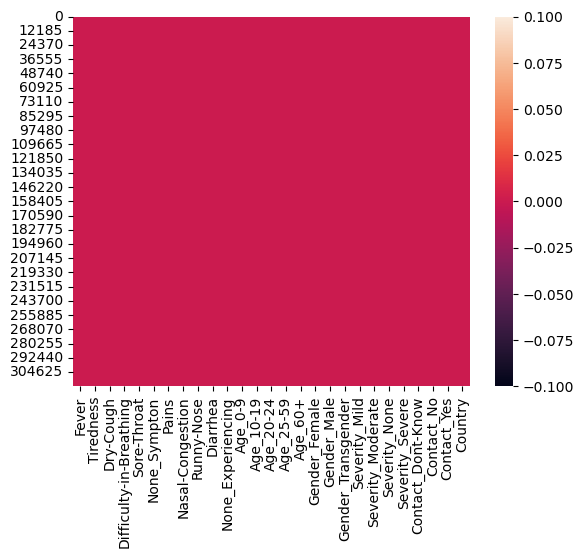

In [4]:
sns.heatmap(df.isnull())

In [5]:
null = df.isnull().sum()

In [6]:
df.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [7]:
df.drop(['Contact_Dont-Know', 'Contact_No', 'Contact_Yes', 'Country', 'Severity_Mild', 'Severity_Moderate', 'Severity_None', 'None_Experiencing', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Gender_Female', 'Gender_Male', 'Gender_Transgender', 'None_Sympton'], axis = 1, inplace = True)

In [8]:
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_60+,Severity_Severe
0,1,1,1,1,1,1,1,1,1,0,0
1,1,1,1,1,1,1,1,1,1,0,0
2,1,1,1,1,1,1,1,1,1,0,0
3,1,1,1,1,1,1,1,1,1,0,0
4,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,0,0,0,0,1,1
316796,0,0,0,0,0,0,0,0,0,1,1
316797,0,0,0,0,0,0,0,0,0,1,0
316798,0,0,0,0,0,0,0,0,0,1,0


In [9]:
train, test = train_test_split(df, test_size = 0.3, random_state=0)

In [10]:
pred = test.copy()

In [11]:
x_train = train.iloc[:, :19].values
x_test = test.iloc[:, :19].values

In [12]:
y_train = train.iloc[:, -1].values
y_test = test.iloc[:, -1].values

In [13]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [14]:
y_pred = model.predict(x_test)

In [15]:
print(accuracy_score(y_test, y_pred))

1.0


In [16]:
pred['prediction'] = y_pred
pred

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,Age_60+,Severity_Severe,prediction
285440,1,1,1,0,0,0,1,1,1,0,1,1
61174,0,0,0,0,0,0,1,1,1,1,0,0
111620,0,0,0,1,0,0,1,0,0,0,1,1
44926,1,0,0,0,0,1,0,0,0,0,0,0
192227,1,1,1,1,1,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
417,1,1,0,0,0,1,1,1,0,0,0,0
66946,0,0,1,0,0,1,1,1,0,0,0,0
58871,0,0,0,1,0,0,0,0,0,1,0,0
92223,0,0,1,1,0,0,0,1,1,1,0,0


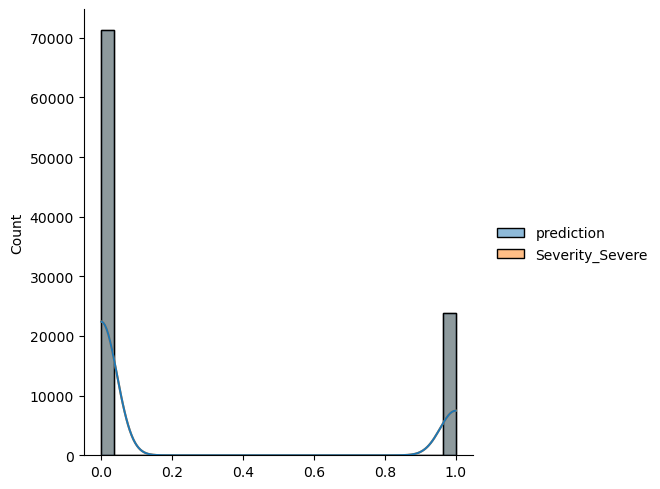

In [17]:
sns.displot(pred[['prediction', 'Severity_Severe']], kde=True)

<AxesSubplot:ylabel='Density'>

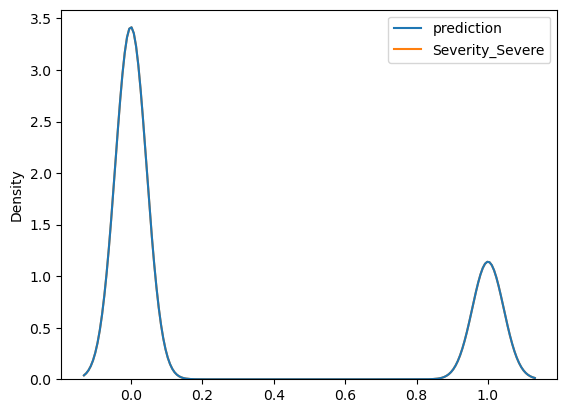

In [18]:
sns.kdeplot(pred[['prediction', 'Severity_Severe']])